## Assignment_2
#### Support vector Regression Model
* Name: Anurag Banger
* Student Id: 20642433

In [2]:
from pandas.plotting import scatter_matrix
from pandas import read_csv
import pandas as pd
import numpy as np 
from matplotlib import pyplot
import seaborn as seabornInstance 

#Reading the data
filename = 'housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset = read_csv(filename, delim_whitespace=True, names=names)


(506, 14)


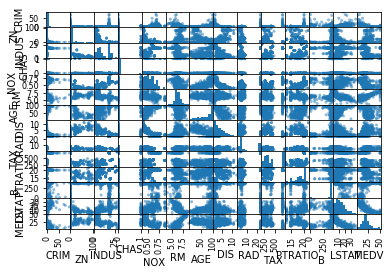

In [43]:
#Describe and Displaying the data
print(dataset.shape)

scatter_matrix(dataset)
pyplot.figure(figsize=(20, 15))
pyplot.show()


In [4]:
print(dataset.describe())


             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [41]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [39]:
print(dataset.corr())


             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

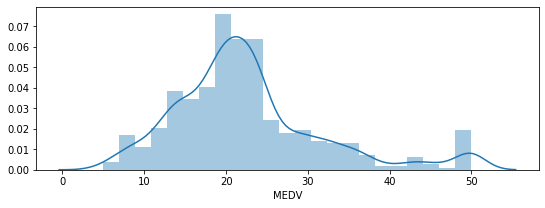

In [7]:
pyplot.figure(figsize=(9,3))
pyplot.tight_layout()
seabornInstance.distplot(dataset['MEDV'])

In [12]:
#Train Test Split
from sklearn.model_selection import train_test_split
array = dataset.values
colX = array[:,0:13]
colY = array[:,13]
validation_size = 0.20
seed = 85
X_train, X_test, Y_train, Y_test = train_test_split(colX, colY, test_size=validation_size, random_state=seed)


In [23]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train_std = sc_X.fit_transform(X_train)
X_test_std = sc_X.fit_transform(X_test)

In [47]:
#KNN, SVC, and LR parameter tuning
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR


model = SVR(kernel='rbf', C=100)
# model = SVR(kernel='linear', C=100, gamma='auto')
# model = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)

model.fit(X_train_std,Y_train)
Y_pred = model.predict(X_test_std)

In [49]:
df = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': Y_pred.flatten()})
df.head(25)

,Actual,Predicted
0,14.8,15.282607
1,22.1,23.068043
2,19.5,18.727181
3,19.2,21.064892
4,19.4,20.386563
5,42.8,39.541974
6,24.4,23.299517
7,23.3,26.069507
8,20.6,17.798168
9,48.5,48.899721


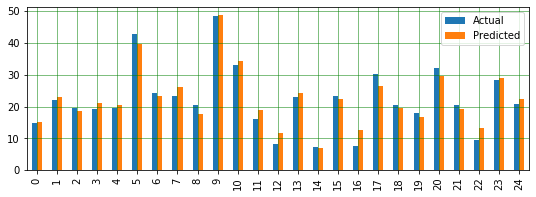

In [28]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(9,3))
pyplot.grid(which='major', linestyle='-', linewidth='0.5', color='green')
pyplot.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
pyplot.show()

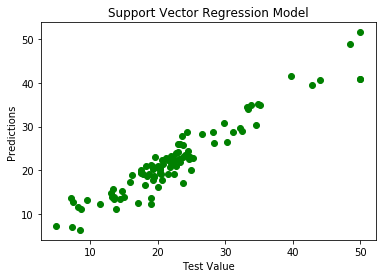

In [29]:
pyplot.scatter(Y_test, Y_pred, color = 'green')
pyplot.title('Support Vector Regression Model')
pyplot.xlabel('Test Value')
pyplot.ylabel('Predictions')
pyplot.show()


In [45]:
#Metric
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('r2_score:',metrics.r2_score(Y_test,Y_pred))
print('explained variance Score:',metrics.explained_variance_score(Y_test,Y_pred))

Mean Absolute Error: 2.045683998294405
Mean Squared Error: 7.432523737676976
Root Mean Squared Error: 2.7262655295618172
r2_score: 0.910109796012726
explained variance Score: 0.9107069269827175
